<a href="https://colab.research.google.com/github/xoyeon/hongong-mldl/blob/main/09_2_%EC%88%9C%ED%99%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9C%BC%EB%A1%9C_IMDB_%EB%A6%AC%EB%B7%B0_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB 리뷰 데이터셋

In [1]:
# imdb 모듈을 임포트하여 데이터 적재하기
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [4]:
# 첫 번재 리뷰의 길이 출력
print(len(train_input[0]))

218


In [5]:
# 두 번재 리뷰의 길이 출력
print(len(train_input[1]))

189


In [6]:
# 첫 번째 리뷰에 담긴 내용 출력
print(train_input[0])   ## IMDB 리뷰 데이터는 이미 정수로 변환되어 있음

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [7]:
# 타깃 데이터 출력
print(train_target[:20])  ## 이진 분류: 부정(0), 긍정(1)

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [8]:
# 훈련 세트에서 검증 세트 떼어 놓기
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [9]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [10]:
print(np.mean(lengths), np.median(lengths))  ## 데이터는 한쪽에 치우친 분포

239.00925 178.0


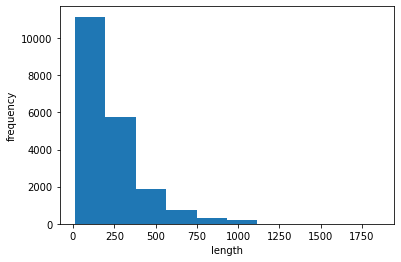

In [12]:
# lengths 배열을 히스토그램으로 표현하기
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [13]:
# 패딩을 사용하여 train_input의 길이를 100으로 맞추기
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

In [14]:
print(train_seq.shape)

(20000, 100)


In [15]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [16]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [17]:
# train_seq에 있는 여섯 번째 샘플 출력
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [18]:
val_seq = pad_sequences(val_input, maxlen=100)

# 순환 신경망 만들기

In [20]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100,500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [21]:
train_oh = keras.utils.to_categorical(train_seq)

In [22]:
print(train_oh.shape)

(20000, 100, 500)


In [23]:
# train_oh의 첫 번째 샘플의 첫 번째 토큰 10 출력
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [25]:
print(np.sum(train_oh[0][0]))

1.0


In [26]:
# val_seq도 원-핫 인코딩으로 바꾸기
val_oh = keras.utils.to_categorical(val_seq)

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


# 순환 신경망 훈련하기

In [28]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 38s 109ms/step - loss: 0.6951 - accuracy: 0.5137 - val_loss: 0.6912 - val_accuracy: 0.5294
Epoch 2/100
313/313 [==============================] - 33s 105ms/step - loss: 0.6804 - accuracy: 0.5674 - val_loss: 0.6753 - val_accuracy: 0.5912
Epoch 3/100
313/313 [==============================] - 32s 103ms/step - loss: 0.6611 - accuracy: 0.6207 - val_loss: 0.6577 - val_accuracy: 0.6258
Epoch 4/100
313/313 [==============================] - 32s 102ms/step - loss: 0.6423 - accuracy: 0.6590 - val_loss: 0.6414 - val_accuracy: 0.6568
Epoch 5/100
313/313 [==============================] - 32s 103ms/step - loss: 0.6245 - accuracy: 0.6842 - val_loss: 0.6261 - val_accuracy: 0.6716
Epoch 6/100
313/313 [==============================] - 32s 102ms/step - loss: 0.6075 - accuracy: 0.7030 - val_loss: 0.6100 - val_accuracy: 0.6922
Epoch 7/100
313/313 [==============================] - 32s 101ms/step - loss: 0.5913 - accuracy: 0.7186 - val_loss: 0.5950 -

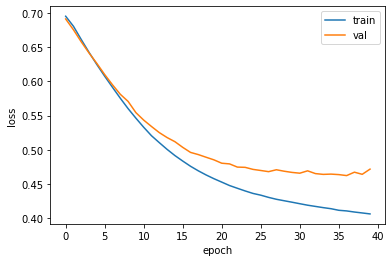

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [30]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


# 단어 임베딩을 사용하기
: 단어 임베딩은 각 단어를 고정된 크기의 실수 벡터로 바꾸어 줌

In [34]:
# Embedding 클래스를 SimpleRNN 층 앞에 추가한 두 번째 순환 신경망을 만들어 보자
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [35]:
model2.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f94e66ca810>>

In [36]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
early_stopping_bd = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=10, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/10
313/313 [==============================] - 42s 131ms/step - loss: 0.6964 - accuracy: 0.5095 - val_loss: 0.6936 - val_accuracy: 0.5128
Epoch 2/10
313/313 [==============================] - 40s 128ms/step - loss: 0.6879 - accuracy: 0.5412 - val_loss: 0.6868 - val_accuracy: 0.5460
Epoch 3/10
313/313 [==============================] - 40s 128ms/step - loss: 0.6784 - accuracy: 0.5741 - val_loss: 0.6784 - val_accuracy: 0.5728
Epoch 4/10
313/313 [==============================] - 40s 128ms/step - loss: 0.6665 - accuracy: 0.6007 - val_loss: 0.6689 - val_accuracy: 0.5896
Epoch 5/10
313/313 [==============================] - 40s 128ms/step - loss: 0.6538 - accuracy: 0.6227 - val_loss: 0.6598 - val_accuracy: 0.6056
Epoch 6/10
313/313 [==============================] - 41s 130ms/step - loss: 0.6430 - accuracy: 0.6390 - val_loss: 0.6544 - val_accuracy: 0.6186
Epoch 7/10
313/313 [==============================] - 40s 129ms/step - loss: 0.6332 - accuracy: 0.6531 - val_loss: 0.6495 - val_ac

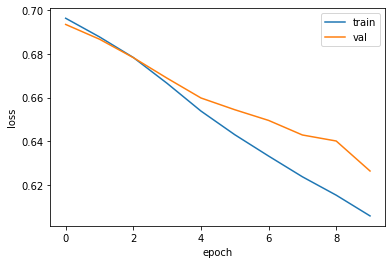

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()